# Frequent Category Imputations

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import stat

%matplotlib inline

In [2]:
df_house = pd.read_csv("advance_house_train.csv", usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])

In [3]:
df_house.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [5]:
df_house.shape

(1460, 4)

In [8]:
df_house.isnull().sum()

BsmtQual        37
FireplaceQu    690
GarageType      81
SalePrice        0
dtype: int64

In [9]:
df_house.isnull().mean()

BsmtQual       0.025342
FireplaceQu    0.472603
GarageType     0.055479
SalePrice      0.000000
dtype: float64

In [14]:
df_house.describe(include='all')

,BsmtQual,FireplaceQu,GarageType,SalePrice
count,1423,770,1379,1460.000000
unique,4,5,6,NaN
top,TA,Gd,Attchd,NaN
freq,649,380,870,NaN
mean,NaN,NaN,NaN,180921.195890
std,NaN,NaN,NaN,79442.502883
min,NaN,NaN,NaN,34900.000000
25%,NaN,NaN,NaN,129975.000000
50%,NaN,NaN,NaN,163000.000000
75%,NaN,NaN,NaN,214000.000000


<AxesSubplot:xlabel='BsmtQual', ylabel='count'>

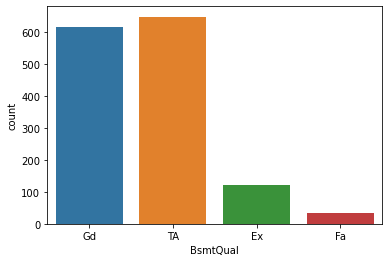

In [16]:
sns.countplot(x=df_house['BsmtQual'])

In [18]:
df_house['BsmtQual'].value_counts()

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

In [47]:
df_house['BsmtQual'].mode()[0]

'TA'

<AxesSubplot:xlabel='FireplaceQu', ylabel='count'>

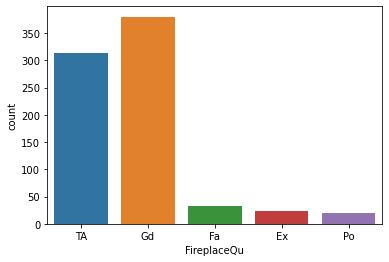

In [19]:
sns.countplot(x=df_house['FireplaceQu'])

In [20]:
df_house['FireplaceQu'].value_counts()

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

In [32]:
df_house['FireplaceQu'].value_counts().index[0]

'Gd'

<AxesSubplot:xlabel='GarageType', ylabel='count'>

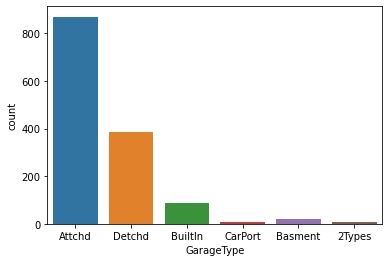

In [21]:
sns.countplot(x=df_house['GarageType'])

In [22]:
df_house['GarageType'].value_counts()

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [31]:
df_house['GarageType'].value_counts().index[0]

'Attchd'

In [48]:
def impute_nan_frequent(df, feature):
    fillValue = df_house[feature].mode()[0]
    df[feature].fillna(fillValue, inplace=True)

In [42]:
for column in df_house.columns:
    if df_house[column].dtype == 'O':
        impute_nan_frequent(df_house, column)

In [43]:
df_house.isnull().sum()

BsmtQual       0
FireplaceQu    0
GarageType     0
SalePrice      0
dtype: int64

<AxesSubplot:xlabel='FireplaceQu', ylabel='count'>

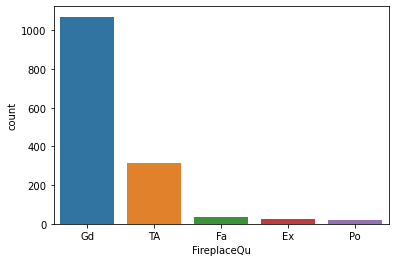

In [45]:
sns.countplot(x=df_house['FireplaceQu'])

Using this method is good for cenrtain amount, Meaning if no of missing values of a feature in >30% then using most frequent one technique will skewed the data a lot. For example FireplaceQu is a lot more skewed towards Gd may be in real world that is correct but we can not assume everytime that will be the case. If per feature having < 30% missing values then using this will be just alright.

#### Advantages

1. Easy to Implement
2. Faster way to implement

#### Disadvantages

1. Since we are using the more frequent labels, it may use them in over represented way, if there are many missing values

2. It distorts the relatation of the most frequent label

# Adding a variable to capture NaN

In [49]:
df_house = pd.read_csv("advance_house_train.csv", usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])
df_house.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [50]:
def capture_nan(df, feature):
    new_feature = feature + '_cap_nan'
    df[new_feature] = np.where(df[feature].isnull(), 1, 0)
    
    impute_nan_frequent(df, feature)

In [51]:
for column in df_house.columns:
    if df_house[column].dtype == 'O':
        capture_nan(df_house, column)

In [52]:
df_house.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_cap_nan,FireplaceQu_cap_nan,GarageType_cap_nan
0,Gd,Gd,Attchd,208500,0,1,0
1,Gd,TA,Attchd,181500,0,0,0
2,Gd,TA,Attchd,223500,0,0,0
3,TA,Gd,Detchd,140000,0,0,0
4,Gd,TA,Attchd,250000,0,0,0
